In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
#Import all essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Heart Disease Prediction/heart disease classification dataset.csv')
df.shape

(303, 15)

In [15]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes


<Axes: >

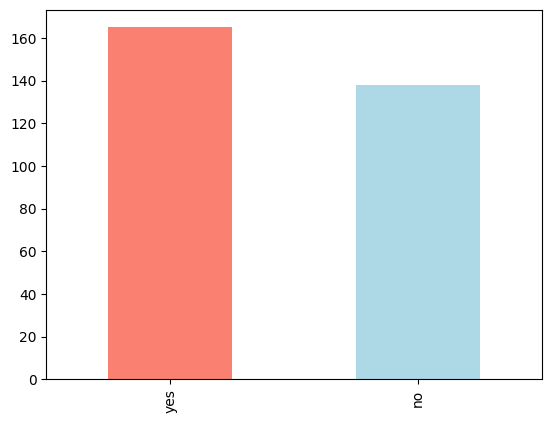

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  293 non-null    int64  
 1   age         293 non-null    int64  
 2   sex         293 non-null    object 
 3   cp          293 non-null    int64  
 4   trestbps    293 non-null    float64
 5   chol        293 non-null    float64
 6   fbs         293 non-null    int64  
 7   restecg     293 non-null    int64  
 8   thalach     293 non-null    float64
 9   exang       293 non-null    int64  
 10  oldpeak     293 non-null    float64
 11  slope       293 non-null    int64  
 12  ca          293 non-null    int64  
 13  thal        293 non-null    int64  
 14  target      293 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 36.6+ KB


In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

Heart Disease freq according to sex

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

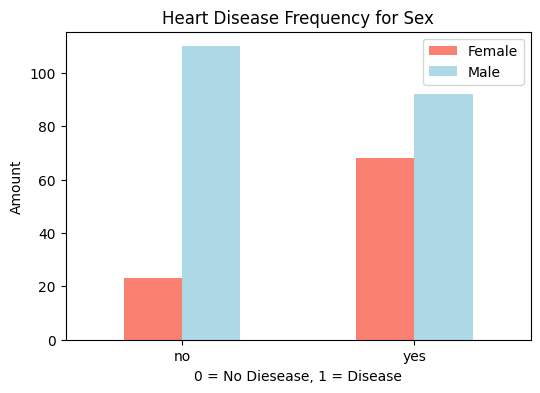

In [19]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(6, 4), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)


Age vs max heart rate

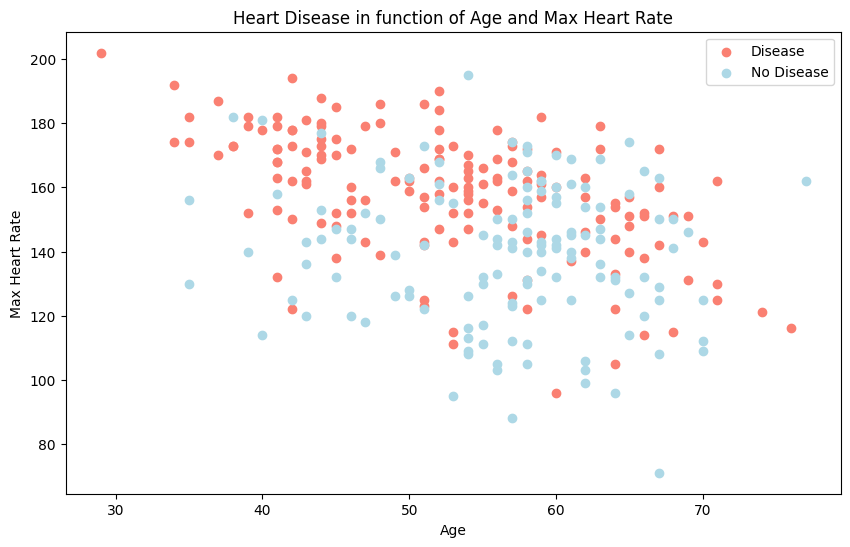

In [22]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target=="yes"],
            df.thalach[df.target=="yes"],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target=="no"],
            df.thalach[df.target=="no"],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

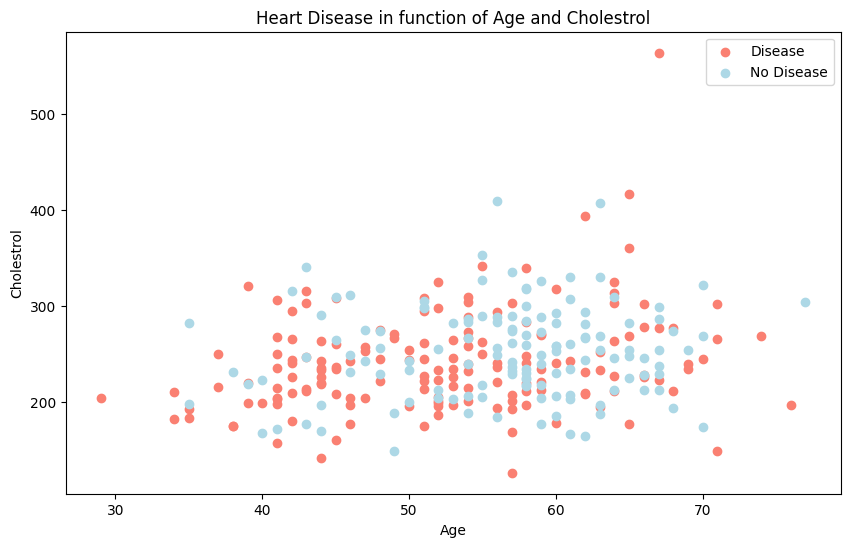

In [23]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target=="yes"],
            df.chol[df.target=="yes"],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target=="no"],
            df.chol[df.target=="no"],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Cholestrol")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.legend(["Disease", "No Disease"]);

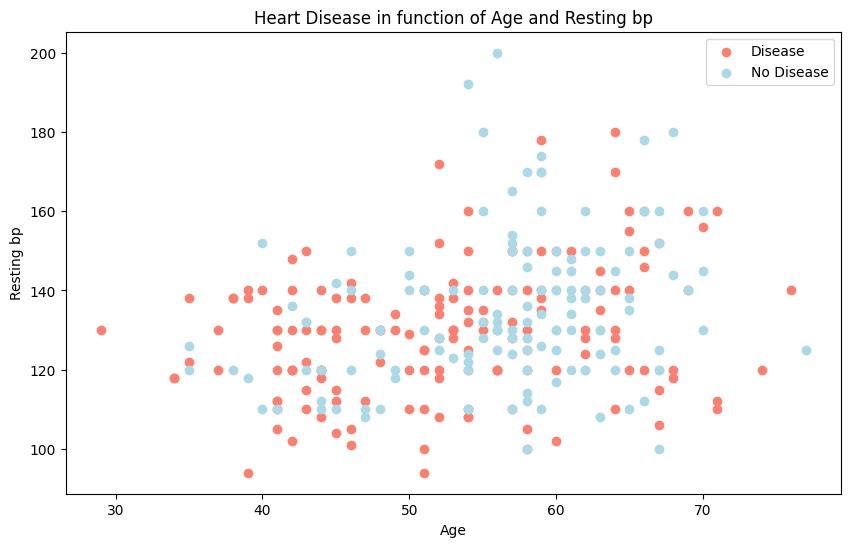

In [25]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target=="yes"],
            df.trestbps[df.target=="yes"],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target=="no"],
            df.trestbps[df.target=="no"],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Resting bp")
plt.xlabel("Age")
plt.ylabel("Resting bp")
plt.legend(["Disease", "No Disease"]);

Correlation Matrix

<ipython-input-27-f2cf0d79d4cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(13.5, -0.5)

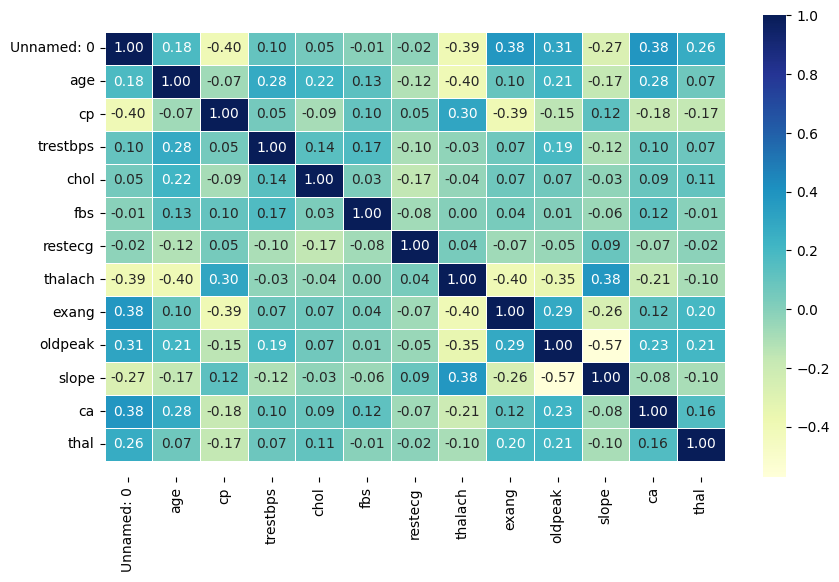

In [27]:
# correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [38]:
from sklearn.preprocessing import LabelEncoder
df['sex'].unique()
gender_label = LabelEncoder()
df['sex']=gender_label.fit_transform(df['sex'])
df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)

Modelling

In [39]:
X = df.drop("target", axis=1)
y = df["target"]

In [40]:
#Splitting dataset
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
models = {"Logistic Regression": LogisticRegression(max_iter=8000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)

  return model_scores

In [51]:
model_score = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_score

{'Logistic Regression': 1.0, 'KNN': 1.0, 'Random Forest': 1.0}

<Axes: >

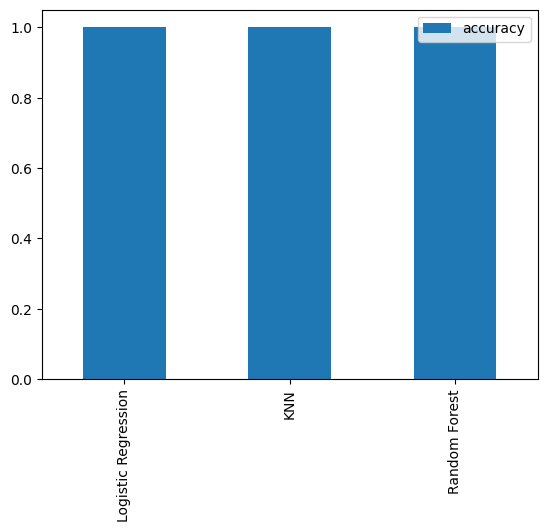

In [52]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare.T.plot.bar()